In [8]:
import pandas as pd
import numpy as np
import networkx as nx
from networkx.algorithms.approximation import clique
import matplotlib.pyplot as plt
from networkx.algorithms.community import k_clique_communities
import networkx as nx
import dwave_networkx as dnx
import dimod
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
%matplotlib inline

In [11]:
trans_act = pd.read_csv('../../../data/trans.csv', low_memory=False)

In [49]:
trans = pd.read_csv('../../../data/trans1.csv', low_memory=False)
trans.head()

,payee,payer
0,1,5
1,1,6
2,1,7
3,1,8
4,1,9


In [50]:
def build_graph(df, source, dest):
    graph = nx.from_pandas_edgelist(df, source=source, target=dest)
    return graph

In [51]:
G = build_graph(trans, 'payee', 'payer')

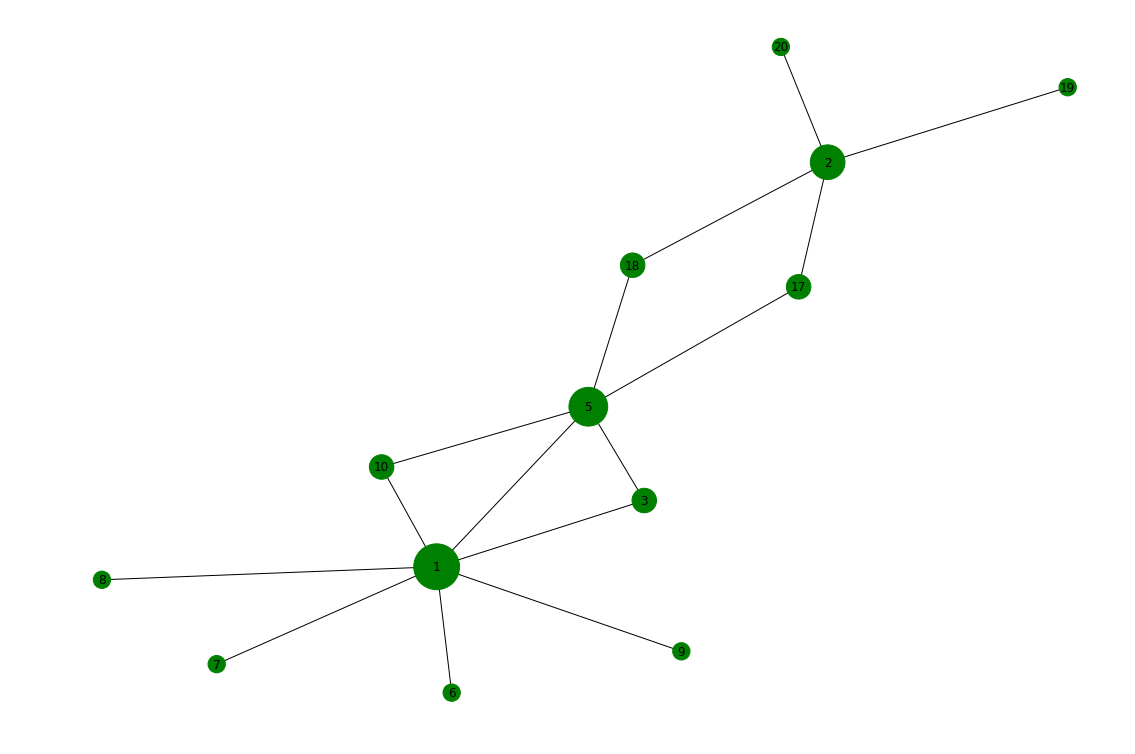

In [52]:
def display_graph(G):
    plt.figure(figsize=(15, 10))
    b = nx.degree(G)
    nx.draw(G, nodelist=dict(b).keys(), node_size=[v * 300 for v in dict(b).values()], 
            with_labels = True, node_color='g')
    plt.show()
display_graph(G)

In [55]:
from dwave_networkx.utils import binary_quadratic_model_sampler

@binary_quadratic_model_sampler(1)
def maximum_independent_set(G, sampler=None, weight=None, lagrange=2.0, **sampler_args):
    Q = maximum_weighted_independent_set_qubo(G, weight, lagrange)
    response = sampler.sample_qubo(Q, **sampler_args)
    #print("Response in the increaseing order of energy {}".format(response))
    sample = next(iter(response))
    #print("lowest energy sample {}".format(sample))
    return [node for node in sample if sample[node] > 0]

def maximum_weighted_independent_set_qubo(G, weight=None, lagrange=2.0):
    if not G:
        return {}
    cost = dict(G.nodes(data=weight, default=1))
    scale = max(cost.values())
    Q = {(node, node): min(-cost[node] / scale, 0.0) for node in G}
    Q.update({edge: lagrange for edge in G.edges})
    return Q
    

In [38]:
def max_clique(G, sampler, lagrange=2.0, **sampler_args):
    if G is None:
        raise ValueError("Expected NetworkX graph!")

    # finding the maximum clique in a graph is equivalent to finding
    # the independent set in the complementary graph
    complement_G = nx.complement(G)
    return maximum_independent_set(complement_G, sampler, lagrange, **sampler_args)

In [39]:
#Use the Dwave system sampler
dwave_sampler = DWaveSampler(token='CDL8-46f51e186f26242322cbc1aec03e41905112cf78', endpoint='https://cloud.dwavesys.com/sapi')

sampler = EmbeddingComposite(dwave_sampler)

In [56]:
#Since the max clique is not guaranteed we'll just run this in a loop

cliques = [max_clique(G, sampler) for i in range(100)]

In [57]:
cliques

[[1, 3, 5],
 [1, 3, 5, 10],
 [5, 18],
 [1, 3, 5],
 [1, 3, 5],
 [1, 5, 10],
 [1, 3, 5],
 [1, 5, 10],
 [5, 10],
 [1, 5, 10],
 [1, 3, 5],
 [1, 3, 5],
 [1, 5, 10],
 [5, 17],
 [1, 3, 5, 10],
 [2, 17, 20],
 [1, 3, 5],
 [1, 5, 10],
 [1, 3, 5, 10],
 [2, 19],
 [1, 3, 5],
 [2, 18, 20],
 [2, 17],
 [1, 5, 10],
 [1, 3, 5, 10],
 [2, 19],
 [1, 8, 9],
 [1, 3, 5, 10],
 [1, 8],
 [1, 5, 10],
 [1, 5, 10],
 [1, 5, 10],
 [1, 5, 10],
 [1, 6, 9],
 [1, 3, 10],
 [1, 3],
 [1, 3, 5],
 [1, 3, 5],
 [1, 3, 5],
 [2, 19],
 [3, 5, 9],
 [1, 3, 8],
 [2, 7, 20],
 [1, 3, 5],
 [2, 19],
 [1, 5, 10],
 [1, 5, 10],
 [2, 17],
 [1, 5, 10],
 [1, 3],
 [1, 5, 10],
 [1, 7, 10],
 [1, 5, 10],
 [1, 9],
 [1, 5, 9, 10],
 [1, 5, 10],
 [1, 3, 5],
 [2, 17],
 [1, 3, 5],
 [1, 3, 5],
 [1, 9],
 [1, 3, 5],
 [1, 5, 10],
 [2, 19],
 [1, 5, 10],
 [1, 6],
 [1, 3, 5, 9],
 [1, 3, 5],
 [1, 5, 10],
 [5, 18],
 [1, 7],
 [1, 5, 10],
 [1, 3, 5],
 [1, 3, 5],
 [1, 5, 6, 10],
 [2, 17],
 [1, 5, 10],
 [5, 17],
 [1, 5, 10],
 [1, 3, 5],
 [1, 3, 5],
 [1, 5, 10],
 [1,